In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from careamics.dataset_ng.patch_extractor import PatchExtractor
from careamics.dataset_ng.patch_extractor.image_stack import InMemoryImageStack
from careamics.dataset_ng.patching_strategies import RandomPatchSpecsGenerator

/localscratch/mamba/envs/cmcs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
array = np.arange(36).reshape(6, 6)
image_stack = InMemoryImageStack.from_array(data=array, axes="YX")
image_stack.extract_patch(sample_idx=0, coords=(2, 2), patch_size=(3, 3))

array([[[14, 15, 16],
        [20, 21, 22],
        [26, 27, 28]]])

In [4]:
rng = np.random.default_rng()

In [5]:
data_path = "/home/igor.zubarev/projects/microSplit-reproducibility/examples/2D/custom_test/data"

In [13]:
# define example readers
# input_patch_extractor = PatchExtractor.from_tiff_files([array1, array2], axes="SYX")
target_patch_extractor = PatchExtractor.from_tiff_files(data_path, axes="YX")

In [21]:
# generate random patch specification
data_shapes = [
    image_stack.data_shape for image_stack in target_patch_extractor.image_stacks
]
patch_specs_generator = RandomPatchSpecsGenerator(patch_size=(256, 256), random_seed=42)
patch_specs = patch_specs_generator.generate(data_shapes=data_shapes)
patch_specs[:5]

[{'data_idx': 0,
  'sample_idx': 0,
  'coords': (160, 1387),
  'patch_size': (256, 256)},
 {'data_idx': 0,
  'sample_idx': 0,
  'coords': (1173, 786),
  'patch_size': (256, 256)},
 {'data_idx': 0,
  'sample_idx': 0,
  'coords': (776, 1539),
  'patch_size': (256, 256)},
 {'data_idx': 0,
  'sample_idx': 0,
  'coords': (154, 1250),
  'patch_size': (256, 256)},
 {'data_idx': 0,
  'sample_idx': 0,
  'coords': (361, 168),
  'patch_size': (256, 256)}]

In [29]:
patches = target_patch_extractor.extract_patches(patch_specs[7:11])

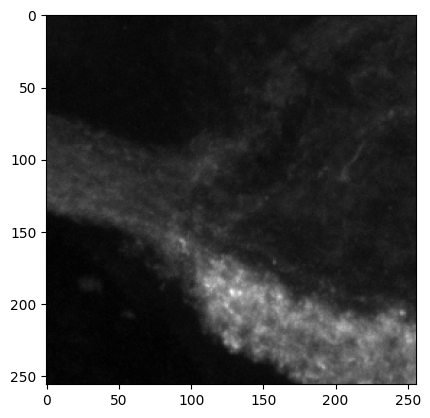

In [34]:
plt.imshow(patches[2].squeeze(), cmap="gray")